In [1]:
import numpy as np #alloys numpy arrays to be used
import matplotlib as mpl #see next comment
import matplotlib.pyplot as plt #allows use of plt. to plot figures
import pandas as pd
import networkx as nx #https://networkx.readthedocs.io/en/stable/index.html  #Aric A. Hagberg, Daniel A. Schult and Pieter J. Swart, “Exploring network structure, dynamics, and function using NetworkX”, in Proceedings of the 7th Python in Science Conference (SciPy2008), Gäel Varoquaux, Travis Vaught, and Jarrod Millman (Eds), (Pasadena, CA USA), pp. 11–15, Aug 2008
import os
from NXFunc import * #imports all my functions from MergerTreeGraphs 
%matplotlib inline

In [3]:
Header = ["scale", "id", "desc_scale", "desc_id", "num_prog", "pid", "upid", "desc_pid", "phantom", "sam_mvir", "mvir", "rvir", "rs", "vrms", "mmp", "scale_of_last_MM", "vmax", "x", "y", "z", "vx", "vy", "vz", "Jx", "Jy", "Jz", "Spin", "Breadth_first_ID", "Depth_first_ID", "Tree_root_ID", "Orig_halo_ID", "Snap_num", "Next_coprogenitor_depthfirst_ID", "Last_progenitor_depthfirst_ID", "Last_mainleaf_depthfirst_ID", "Tidal_Force", "Tidal_ID", "Rs_Klypin", "Mvir_all", "M200b", "M200c", "M500c", "M2500c", "Xoff", "Voff", "Spin_Bullock", "b_to_a", "c_to_a", "Ax", "Ay", "Az", "b_to_a500c", "c_to_a500c", "Ax500c", "Ay500c", "Az500c", "T/|U|", "M_pe_Behroozi", "M_pe_Diemer" ]

Finds the first merger tree above a given size

In [ ]:
Size = 13
Files = os.listdir("/data/B-P50Mpc/Processed")
for File in Files:
    df = pd.read_csv("/data/B-P50Mpc/Processed/%s" %(File), delim_whitespace = True, names = Header)
    if(np.log10(df[df.scale == 1.00231].M200c[0])>Size):
        print(File)
        break

In [4]:
df = pd.read_csv("/data/B-P50Mpc/Processed/Tree2809667873.dat", delim_whitespace = True, names = Header)

In [ ]:
#df = pd.read_csv("/data/B-P50Mpc/Above12/Tree746490.dat", delim_whitespace = True, names = Header)

In [5]:
df.M200c = np.log10(df.M200c) #turns m200c into a log10 m200c

/home/pg1g15/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


In [6]:
print(df.loc[:,['id','scale','M200c', 'upid', 'mmp', 'desc_id']]) #prints the things we care about from the DF

              id    scale      M200c        upid  mmp     desc_id
0     2809667873  1.00231  13.090752          -1    1          -1
1     2796585936  0.99472  13.086039          -1    1  2809667873
2     2783301630  0.98712  13.079615          -1    1  2796585936
3     2783301631  0.98712   8.667360  2783301630    0  2796585936
4     2769846645  0.97953  13.070518          -1    1  2783301630
5     2769846646  0.97953   8.491264  2769846645    0  2783301630
6     2769846648  0.97953   8.667360  2769846645    1  2783301631
7     2756389249  0.97193  13.058388          -1    1  2769846645
8     2756389250  0.97193   8.190248  2756389249    1  2769846646
9     2756389252  0.97193   8.667360  2756389249    1  2769846648
10    2742883664  0.96434  13.037426          -1    1  2756389249
11    2742883665  0.96434   9.588182  2742883664    0  2756389249
12    2742883667  0.96434   8.792301  2742883664    1  2756389250
13    2742883669  0.96434   8.667360  2742883664    1  2756389252
14    2729

In [ ]:
grouped = df.groupby('scale') # creates and prints a grouped version of the dataframe
for name, group in grouped:
    print(group.loc[:,['id','scale','M200c', 'upid', 'mmp', 'desc_id']])

In [7]:
MPH = df.id[0]
print(MPH)

2809667873


Reads DF to create network 

In [12]:
SF = 0.5
DF = df[df.scale > SF]
MergerTree = nx.from_pandas_dataframe(DF.drop(0), "id", "desc_id", edge_attr = "mmp", create_using = nx.Graph())
nx.set_node_attributes(MergerTree, 'scale', pd.Series(DF.scale.values, index=DF.id).to_dict())
nx.set_node_attributes(MergerTree, 'M200c', pd.Series(DF.M200c.values, index=DF.id).to_dict())
nx.set_node_attributes(MergerTree, 'mmp', pd.Series(DF.mmp.values, index=DF.id).to_dict())
nx.set_node_attributes(MergerTree, 'upid', pd.Series(DF.upid.values, index=DF.id).to_dict())
nx.set_node_attributes(MergerTree, 'pid', pd.Series(DF.pid.values, index=DF.id).to_dict())

In [13]:
#sets the colors and MP/SUB properties of the halos
MPB = DefineMPB(MergerTree, MPH, MPB = [MPH])
DefineSubHalos(MergerTree, MPH)

In [14]:
#gets the Main prog branch
MPB = DefineMPB(MergerTree, MPH, MPB = [MPH])

#defines dubhalos
DefineSubHalos(MergerTree, MPH)

#Removes the doubble count
RemoveDCM(MergerTree, MPH, MPB, 0, Doubble_Count= [])

#Gets infall halos
TreeList = MakeSEMTree(MergerTree, MPH, MPB, 0)


print(TreeList)

[[2809667873], [2796585936.0], [2783301630.0], [2769846645.0], [2756389249.0], [2742883664.0], [2729323168.0], [2715731340.0], [2702099134.0], [2688423512.0, 2674703432.0], [2674703419.0], [2660936545.0], [2647118831.0, 2633249648.0], [2633249635.0], [2619328533.0], [2605352351.0], [2591317076.0], [2577223957.0], [2563069520.0, 2548852497.0], [2548852483.0, 2534571474.0, 2534571477.0], [2534571464.0], [2520224700.0, 2505811933.0], [2505811924.0, 2491330008.0], [2491329988.0, 2476776395.0], [2476776382.0], [2462152236.0, 2447455458.0], [2447455447.0], [2432682080.0], [2417831893.0, 2402902330.0], [2402902322.0], [2387892376.0], [2372801575.0], [2357627198.0, 2342366568.0], [2342366551.0, 2327020111.0], [2327020085.0, 2311583876.0], [2311583863.0], [2296057837.0, 2280441406.0], [2280441388.0], [2264731856.0], [2248923275.0, 2233018312.0, 2233018315.0], [2233018302.0], [2217014407.0, 2200908405.0, 2200908429.0], [2200908401.0], [2184745792.0], [2168535402.0], [2152284448.0, 2135969320.0],

In [15]:
A = np.array(TreeList)

In [17]:
A

array([[2809667873], [2796585936.0], [2783301630.0], [2769846645.0],
       [2756389249.0], [2742883664.0], [2729323168.0], [2715731340.0],
       [2702099134.0], [2688423512.0, 2674703432.0], [2674703419.0],
       [2660936545.0], [2647118831.0, 2633249648.0], [2633249635.0],
       [2619328533.0], [2605352351.0], [2591317076.0], [2577223957.0],
       [2563069520.0, 2548852497.0],
       [2548852483.0, 2534571474.0, 2534571477.0], [2534571464.0],
       [2520224700.0, 2505811933.0], [2505811924.0, 2491330008.0],
       [2491329988.0, 2476776395.0], [2476776382.0],
       [2462152236.0, 2447455458.0], [2447455447.0], [2432682080.0],
       [2417831893.0, 2402902330.0], [2402902322.0], [2387892376.0],
       [2372801575.0], [2357627198.0, 2342366568.0],
       [2342366551.0, 2327020111.0], [2327020085.0, 2311583876.0],
       [2311583863.0], [2296057837.0, 2280441406.0], [2280441388.0],
       [2264731856.0], [2248923275.0, 2233018312.0, 2233018315.0],
       [2233018302.0], [221701440

In [ ]:
#calculates the doubble count of mass
Out = CountDCM(MergerTree, MPH, Doubble_Count= [])
print(Out)
print(np.log10(np.sum(np.power(10, np.array(Out)))))

#Removes the doubble count
Morig = [MergerTree.node[n]['M200c'] for n in MPB]
RemoveDCM(MergerTree, MPH, MPB, 0, Doubble_Count= [])
Mcorr = [MergerTree.node[n]['M200cCor'] for n in MPB]
#Mcorr = [MergerTree.node[n]['M200cCor'] for n in MPB]
Mdiff = np.log10(np.power(10, Morig) - np.power(10, Mcorr))
print(np.column_stack((Morig,Mcorr,Mdiff)))


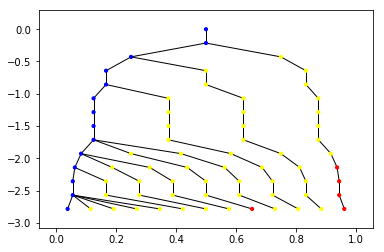

In [11]:
Redshift = (1/SF) -1
#Sets Attributes of root
nx.set_node_attributes(MergerTree, 'color', {MPH: 'blue'})

#makes color mapping for plotting hte nodes
nodes = MergerTree.nodes()
colors = [MergerTree.node[n]['color'] for n in nodes]

#makes the graph area
fig = plt.figure()
fig.set_axes
#plt.ylim(Redshift,0)
#plt.xlim(0.1, -3)
ax = fig.add_axes()

#Makes the positioning of the nodes
pos = hierarchy_pos(MergerTree, MPH, height = 3) #2nd input is the root (MP at z = 0)
#pos = MakePosition(MergerTree, MPH, MPB, MPH, 0)
#'draws' the graph
nx.draw_networkx(MergerTree, pos = pos, nodelist = nodes, node_color = colors, with_labels = False, node_size = 10, ax = ax)

In [ ]:
z = [((1/MergerTree.node[n]['scale'])-1) for n in MPB]

In [ ]:
#Mdiff[Mdiff<0] = 0

#PLOT
fig1 = plt.figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.3,.8,.6))
#xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
plt.plot(z,Morig, label = 'orig')
plt.plot(z,Mcorr, '--', label = 'corr')
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.legend(loc = 1)
plt.plot()

#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.2))  
plt.plot(z,Mdiff)
plt.plot()

In [ ]:
pd.DataFrame([x[1] for x in MergerTree.nodes(data = True)], index=[x[0] for x in MergerTree.nodes(data = True)]).reset_index()

In [ ]:
A = MergerTree.nodes(data = True)

In [ ]:
MergerTree2 = nx.Graph()
MergerTree2.add_nodes_from(MergerTree.nodes(data = True))

In [ ]:
pd.DataFrame([x[1] for x in MergerTree2.nodes(data = True)], index=[x[0] for x in MergerTree2.nodes(data = True)]).reset_index()

In [ ]:
MakeSEMTree(MergerTree, MPH, MPB, 0)

In [ ]:
MergerTree.node[MPH]